In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/home/amol/CMPE_255/Project/train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
data.drop(['id'],inplace=True,axis=1)
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
data.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [6]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# Data Analysis

## Gender

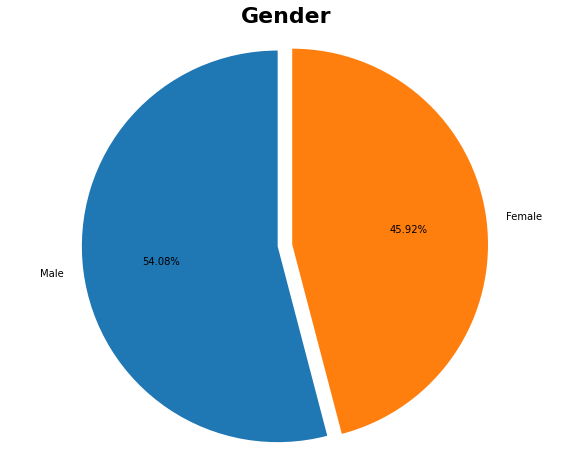

In [12]:
plt.figure(figsize=(10,8))
plt.pie(data.Gender.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',radius=4,labels=['Male','Female'])
plt.title('Gender', fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

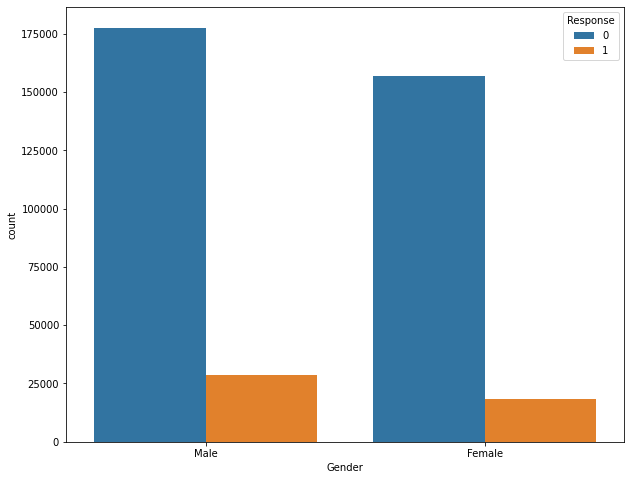

In [15]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(data.Gender,hue=data.Response)
plt.show()

In [16]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes
correlation1=data.corr()

In [18]:
correlation1[['Gender']].sort_values(by='Gender',ascending=False)

,Gender
Gender,1.000000
Policy_Sales_Channel,0.111159
Previously_Insured,0.081932
Driving_License,0.018374
Vintage,0.002517
Region_Code,-0.000604
Annual_Premium,-0.003673
Response,-0.052440
Age,-0.145545


## Vehicle Age

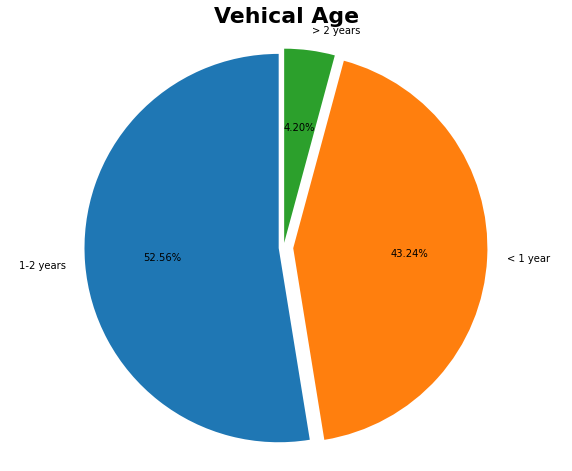

In [25]:
plt.figure(figsize=(10,8))
plt.pie(data.Vehicle_Age.value_counts(),explode=[.1,.2,.1],startangle=90,autopct='%.2f%%',radius=4,labels=['1-2 years','< 1 year','> 2 years'])
plt.title('Vehical Age',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

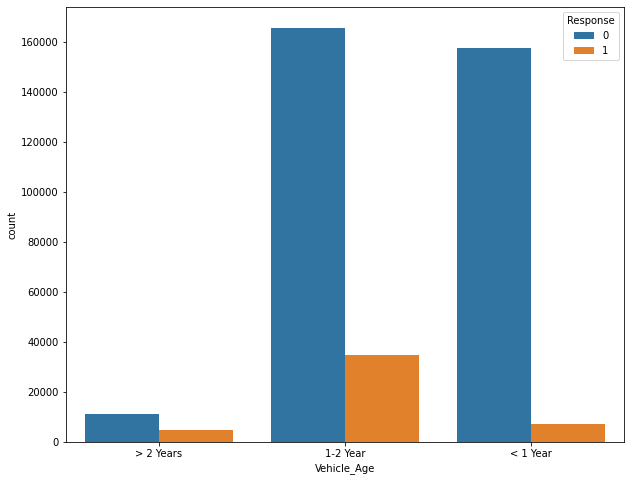

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data.Vehicle_Age,hue=data.Response)
plt.show()

In [26]:
data.Vehicle_Age=pd.Categorical(data.Vehicle_Age,categories=['1-2 Year','< 1 Year','> 2 Years'],ordered=True).codes
correlation2=data.corr()

In [27]:
correlation2[['Vehicle_Age']].sort_values(['Vehicle_Age'],ascending=False)

,Vehicle_Age
Vehicle_Age,1.000000
Policy_Sales_Channel,0.388551
Previously_Insured,0.174783
Gender,0.112625
Driving_License,0.030173
Annual_Premium,0.023656
Vintage,0.002484
Region_Code,-0.027840
Response,-0.104078
Age,-0.522300


## Vehicle Damage

In [32]:
data.Vehicle_Damage.value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

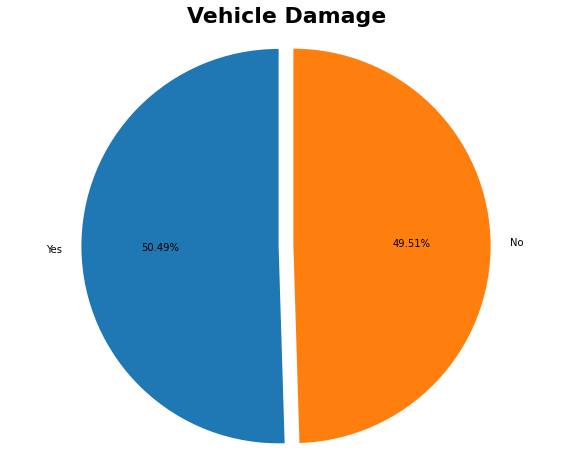

In [33]:
plt.figure(figsize=(10,8))
plt.pie(data.Vehicle_Damage.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',radius=4,labels=['Yes','No'])
plt.title('Vehicle Damage',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

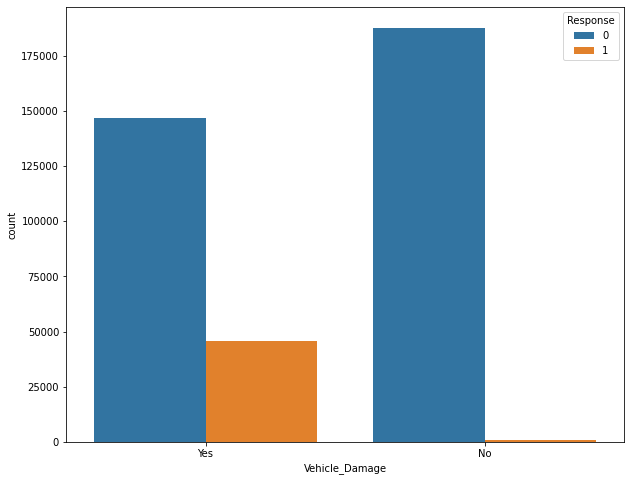

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(data.Vehicle_Damage,hue=data.Response)
plt.show()

In [35]:
data.Vehicle_Damage=pd.Categorical(data.Vehicle_Damage,categories=['Yes','No'],ordered=True).codes
correlation3=data.corr()

In [37]:
correlation3[['Vehicle_Damage']].sort_values(by='Vehicle_Damage',ascending=False)

,Vehicle_Damage
Vehicle_Damage,1.000000
Previously_Insured,0.824143
Policy_Sales_Channel,0.224377
Vehicle_Age,0.174238
Gender,0.091606
Driving_License,0.016622
Vintage,0.002064
Annual_Premium,-0.009349
Region_Code,-0.028235
Age,-0.267534


### Correlation Matrix

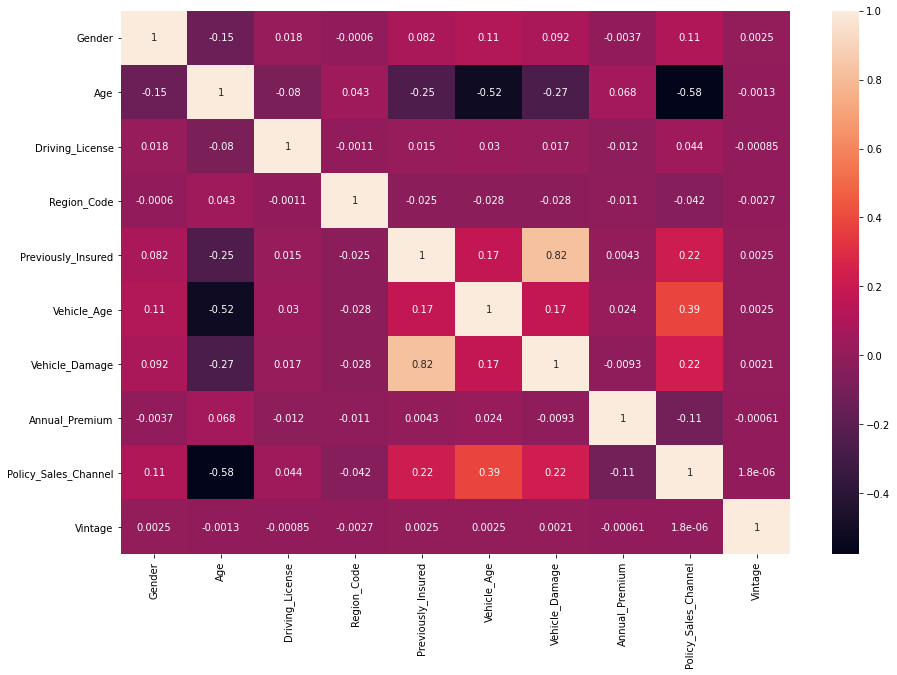

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation=data.iloc[:,:-1].corr()
top_features=correlation.index
plt.figure(figsize=(15,10))
sns.heatmap(data[top_features].corr(),annot=True)
plt.show()

# Model Prediction

In [53]:
X=data.iloc[:,:-1]
y=data['Response']

In [51]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,44,1,28.0,0,2,0,40454.0,26.0,217
1,0,76,1,3.0,0,0,1,33536.0,26.0,183
2,0,47,1,28.0,0,2,0,38294.0,26.0,27
3,0,21,1,11.0,1,1,1,28619.0,152.0,203
4,1,29,1,41.0,1,1,1,27496.0,152.0,39


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=42)

# DecisionTreeClassifier

In [70]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
model1=DecisionTreeClassifier(random_state=42,max_depth=8)
grid1=GridSearchCV(model1,param_grid={'max_depth':range(5,8)})
grid1.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=8, random_state=42),
             param_grid={'max_depth': range(5, 8)})

In [71]:
grid1.best_params_

{'max_depth': 5}

In [72]:
classifier1=DecisionTreeClassifier(random_state=42,max_depth=5)
classifier1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [73]:
pred_test_y=classifier1.predict(X_test)
pred_train_y=classifier1.predict(X_train)


In [74]:
print('Classification report of train data \n',classification_report(y_train,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    301071
           1       0.00      0.00      0.00     41927

    accuracy                           0.88    342998
   macro avg       0.44      0.50      0.47    342998
weighted avg       0.77      0.88      0.82    342998



In [75]:
print('Classification report of test data \n',classification_report(y_test,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     33328
           1       0.00      0.00      0.00      4783

    accuracy                           0.87     38111
   macro avg       0.44      0.50      0.47     38111
weighted avg       0.76      0.87      0.82     38111



# Random 

In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(random_state=42,max_depth=6)
classifier2.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [77]:
pred_test1_y=classifier2.predict(X_test)
pred_train1_y=classifier2.predict(X_train)

In [78]:
print('Classification report of train data \n',classification_report(y_train,pred_train1_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    301071
           1       0.00      0.00      0.00     41927

    accuracy                           0.88    342998
   macro avg       0.44      0.50      0.47    342998
weighted avg       0.77      0.88      0.82    342998



In [79]:
print('Classification report of test data \n',classification_report(y_test,pred_test1_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     33328
           1       0.00      0.00      0.00      4783

    accuracy                           0.87     38111
   macro avg       0.44      0.50      0.47     38111
weighted avg       0.76      0.87      0.82     38111

